---
# Detailed Analysis Report 

### Pranav Sunil Raja 
### Student ID: 240408545


## Introduction

This report analyzes three datasets used in the coursework, explaing the preprocessing steps, algorithms applied, and insights drawn from each dataaset. The focus is on explaining each code and algorithm choice, along with their significance in the respective tasks.

The first dataset, FARS (fars.csv), focuses on understanding factors contributing to traffic accidents through classification techniques. The second dataset, Fitting Results (fitting-results.csv), explores regression models to predict outcomes based on experimental or scientific data. The third dataset, News (news.csv), employs Natural Language Processing (NLP) techniques to analyze textual content, providing insights into patterns and classifications within news articles.



---
## Dataset 1: **FARS Dataset (`fars.csv`)**

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label (target variable) is about the severity of the accident. It has 20 features and over 100K examples. 

### **Objective:**
The dataset aims to predict the injury severity in road accidents, a classification task. Four algorithms were developed for the classification purpose they are Logistic Regression, Random Forest Classifier, Support Vector Machines (SVM) and Gradient Boosting Classifier.

### **1. Exploratory Data Analysis (EDA):**
- `pandas` were used to load and read the `fars.csv` file, allowing us to manipulate data also known as Data Manipulation. 
- `info()` and `describe()` provides a structural and statistical overview, briefs about the data types, null values, and feature distributions.
- Missing values were identified using `isnull().sum()`and irrelevant features were removed.
- Both categorical and numerical features were explored and visualized. The class distribution of the target is visualized using a Pie chart which is helpful to asses the imbalances in the dataset.
- A correlation cluster heatmap is ploted to check if any strong correlations are found.
- Histograms illustrate individual feature distributions, ensuring no major anomalies are present.


Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE_(1_of_3)', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'INJURY_SEVERITY'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 

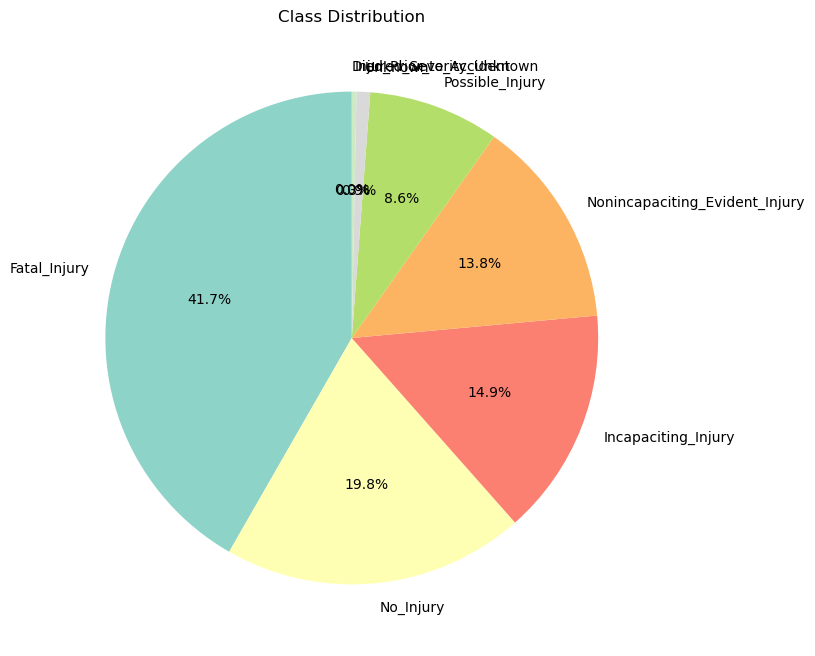

Correlation Matrix:
                                 AGE  ALCOHOL_TEST_RESULT  \
AGE                         1.000000            -0.052557   
ALCOHOL_TEST_RESULT        -0.052557             1.000000   
DRUG_TEST_RESULTS_(1_of_3)  0.039611             0.026498   
DRUG_TEST_RESULTS_(2_of_3)  0.040176             0.080100   
DRUG_TEST_RESULTS_(3_of_3)  0.041652             0.102437   

                            DRUG_TEST_RESULTS_(1_of_3)  \
AGE                                           0.039611   
ALCOHOL_TEST_RESULT                           0.026498   
DRUG_TEST_RESULTS_(1_of_3)                    1.000000   
DRUG_TEST_RESULTS_(2_of_3)                    0.632642   
DRUG_TEST_RESULTS_(3_of_3)                    0.626477   

                            DRUG_TEST_RESULTS_(2_of_3)  \
AGE                                           0.040176   
ALCOHOL_TEST_RESULT                           0.080100   
DRUG_TEST_RESULTS_(1_of_3)                    0.632642   
DRUG_TEST_RESULTS_(2_of_3)      

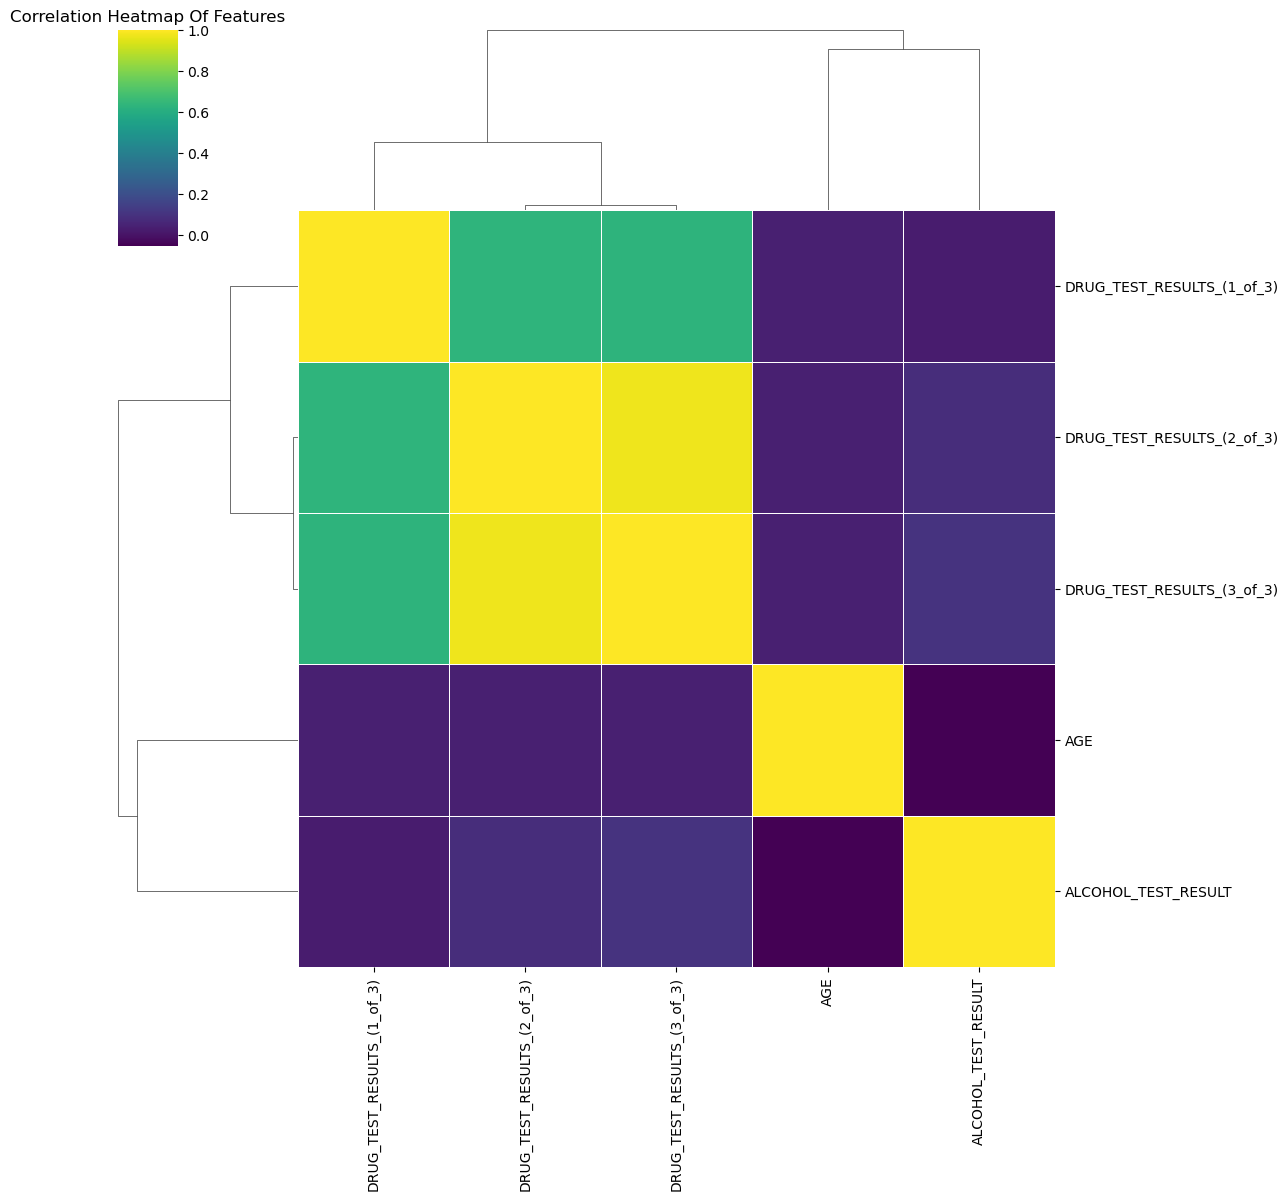

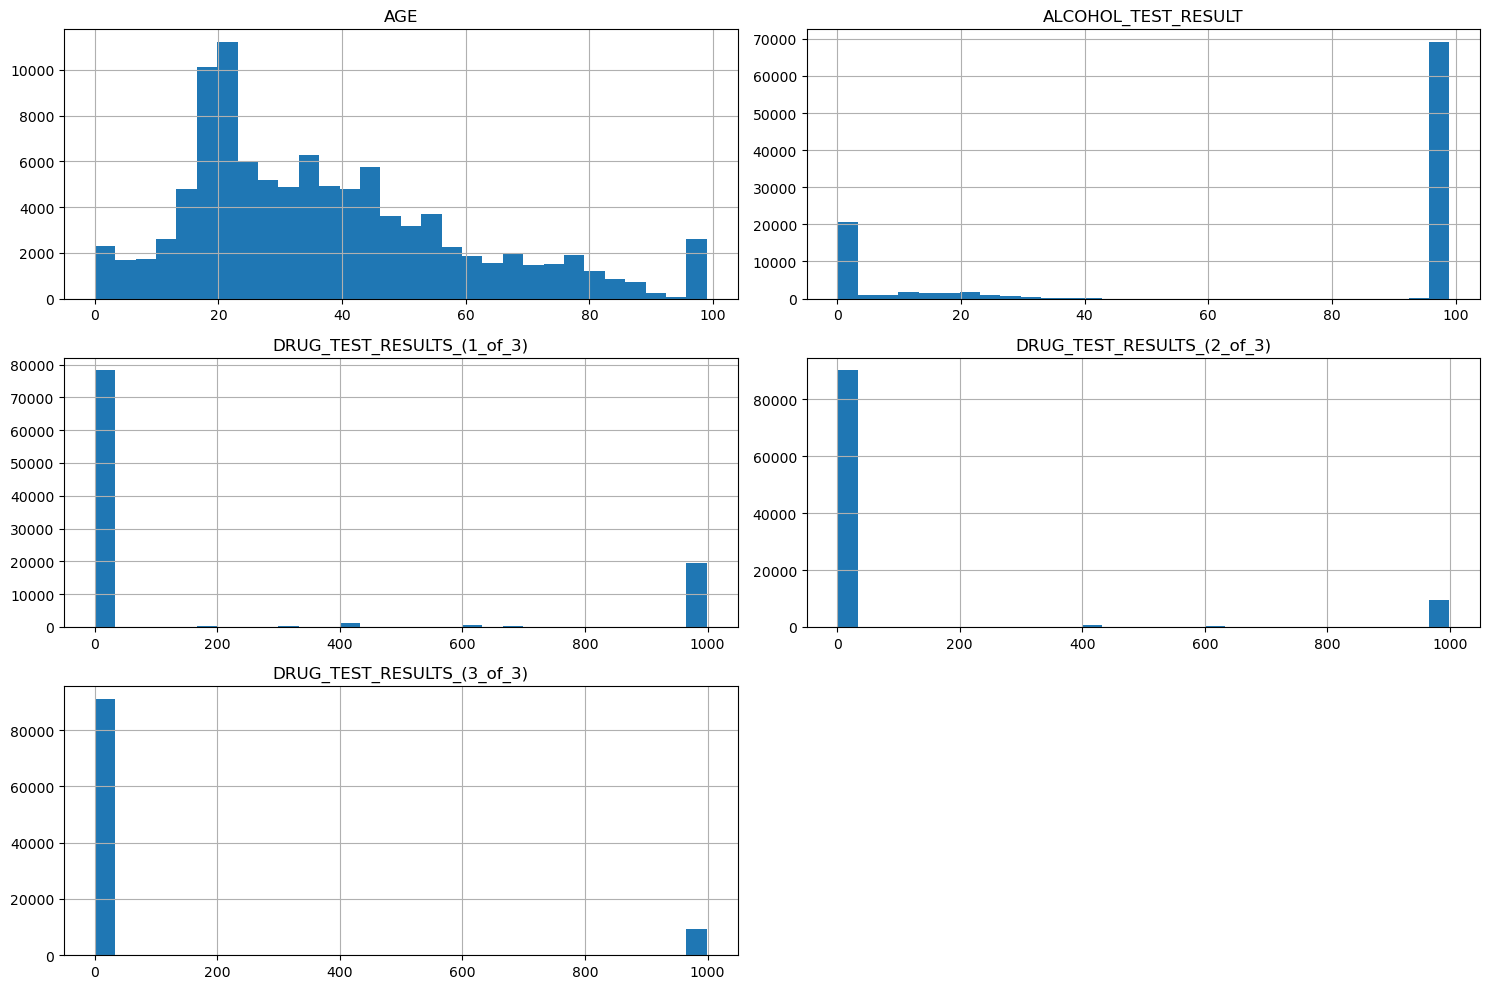

In [5]:
# 1. EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fars_data = pd.read_csv('fars.csv')
print(fars_data.columns)

# Understanding the dataset
print(fars_data.info())
print(fars_data.describe())

# Checking if missing values are present and computing sum of TRUE values
print(fars_data.isnull().sum())

# Class distribution 
target = fars_data.columns[-1]  # last column is the target
target_distribution = fars_data[target].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
target_distribution.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Class Distribution")
plt.ylabel('')  
plt.show()

correlation_matrix = fars_data.corr(numeric_only=True)
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Correlation heatmap
sns.clustermap(fars_data.corr(numeric_only=True), cmap="viridis", linewidths=0.5, figsize=(12, 12))
plt.title("Correlation Heatmap Of Features")
plt.show()

# Feature distributions visualizations 
fars_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


### **2. Data Preprocessing**
- In order to maintain compatabilty with the ML Algorithms all the categorical features were converted into numerical format using `LabelEncoder`.
- In order to standardize the data all features were normalized hence mitigating the impact of varying scales.
- For the purpose of normalization `StandardScaler` was used because a few models relies on distance-based calculations.


In [7]:
# 2. Data Normalization

from sklearn.preprocessing import LabelEncoder

# Identification of categorical data
categorical_features = fars_data.select_dtypes(include=['object']).columns

# Label Encoding
label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    fars_data[col] = label_encoders[col].fit_transform(fars_data[col]) 

# Verification to check if everything is in numeric format.
print(fars_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   CASE_STATE                           100968 non-null  int32
 1   AGE                                  100968 non-null  int64
 2   SEX                                  100968 non-null  int32
 3   PERSON_TYPE                          100968 non-null  int32
 4   SEATING_POSITION                     100968 non-null  int32
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  int32
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  int32
 7   EJECTION                             100968 non-null  int32
 8   EJECTION_PATH                        100968 non-null  int32
 9   EXTRICATION                          100968 non-null  int32
 10  NON_MOTORIST_LOCATION                100968 non-null  int32
 11  POLICE_REPORTED_ALCOHOL_INVOLVEMENT  10

In [8]:
from sklearn.preprocessing import StandardScaler

# Separating features and target 
X = fars_data.iloc[:, :-1]  
y = fars_data.iloc[:, -1]   

# Normalization of data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertion back to DataFrame 
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


### **3. Splitting of Datasets using cross-validation**
- The data was split as Training set 80% and Testing set 20% which could be easily reproduced by setting seed. 
- K-fold with 5 folds cross-validation was carried out usong `StratifiedKFold`


In [9]:
# 3. Split the data into training and test sets using cross-validation

from sklearn.model_selection import train_test_split, StratifiedKFold

# Splitting the Dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# K-fold Cross-Validation with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### **4. Machine Learning Algorithms**

### **4.1 Logistic Regression Classifier**:
- It is a straightforward and a easily interpretible model which is quite used for binary or multiclass classification.
- It serves as a baseline for some of the performance comparisons.
- `LogisticRegression` was used to build this pipeline.
- `GridSearchCV` is used for hyperparemeter tuning with the help of parameter grid given using `param_grid`.


In [10]:
# 4. Develop four machine learning pipelines for classifying the severity of the accident

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 4.1 Logistic Regression 
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # hyperparameter that need to be tuned
log_reg = LogisticRegression(max_iter=1000)

grid_log_reg = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_log_reg.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best cross-validated accuracy:", grid_log_reg.best_score_)

# Retrieval and storage the best model with tuned paarameters
log_reg_best = grid_log_reg.best_estimator_



Best parameters for Logistic Regression: {'C': 10}
Best cross-validated accuracy: 0.7054374394824926


### **4.2 Random Forest Classifier**:
- Random Forest is an ensemble algorithm that combines multiple decision trees. It averages their predictions to improve accuracy and robustness.
- Its usually preferred because it effectively handles class imbalance and captures non-linear patterns in the data.
- Random Forest outperformed Linear regression in capturing complex relationships, particularly when the number of trees and maximum depth were optimized.
- `RandomForestClassifier` was used to build this pipeline. 

In [16]:
# 4.2 Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

### **4.3 Support Vector Machine (SVM)**:
- SVM finds the optimal hyperplane that separates classes with the maximum margin. Kernels like linear or Radial Basis Functions are used to handle non-linear relationships.
- SVM is robust for high-dimensional data and works well when there is a clear margin of separation. Its flexibility with kernels makes it suitable for both linear and non-linear patterns.
- Using a linear kernel, SVM achieved reasonable accuracy. However, misclassification was observed in overlapping classes, indicating room for improvement with hyperparameter tuning or kernel selection.
- `SVC` was used to build this pipeline.
- Using a RBF kernel, SVM achieved reasonable accuracy.

In [23]:
# 4.3 Support Vector Machine (SVM)
from sklearn.svm import SVC

# SVM with RBF (Radial basis function, which is used for non-linear data) kernel
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)


SVC(probability=True, random_state=42)

### **4.4 Gradient Boosting Classifier**:
- This sequentially builds model to minimize classification errors.
- Handles complex relationships effectively, often outperforming simpler models. 
- Fairly a good option to use.
- `GradientBoostingClassifier` was used to build this pipeline.

In [24]:
# 4.4 Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)



GradientBoostingClassifier(random_state=42)

### 5. Evaluation & Visualization of Model Results

Logistic Regression Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.87      0.89      0.88      8423
           2       0.48      0.49      0.49      3014
           3       1.00      0.07      0.12        60
           4       0.77      0.91      0.84      4002
           5       0.41      0.51      0.45      2778
           6       0.47      0.04      0.08      1735
           7       0.62      0.68      0.65       180

    accuracy                           0.71     20194
   macro avg       0.58      0.45      0.44     20194
weighted avg       0.69      0.71      0.68     20194

ROC-AUC Score (One-vs-Rest): 0.8742312849960526


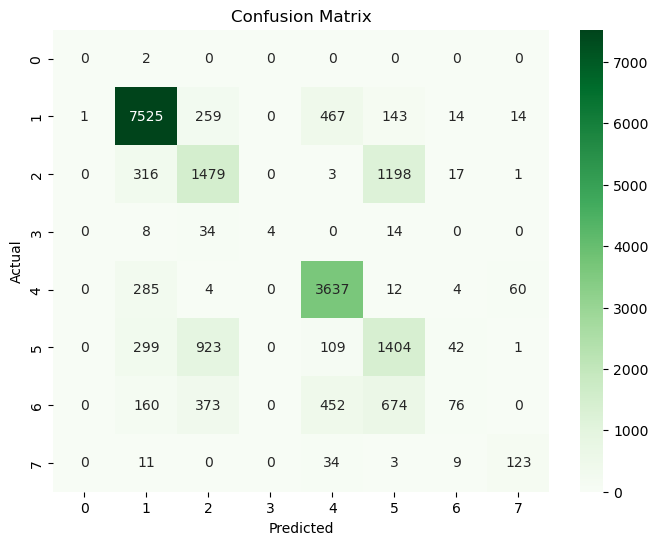

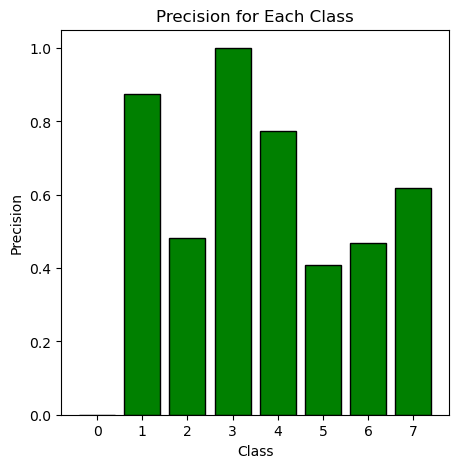

Random Forest Performance:


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      8423
           2       0.55      0.61      0.58      3014
           3       0.64      0.35      0.45        60
           4       0.86      0.93      0.90      4002
           5       0.45      0.45      0.45      2778
           6       0.34      0.23      0.27      1735
           7       0.75      0.73      0.74       180

    accuracy                           0.78     20194
   macro avg       0.57      0.54      0.55     20194
weighted avg       0.77      0.78      0.77     20194

ROC-AUC Score (One-vs-Rest): 0.8655007718002344


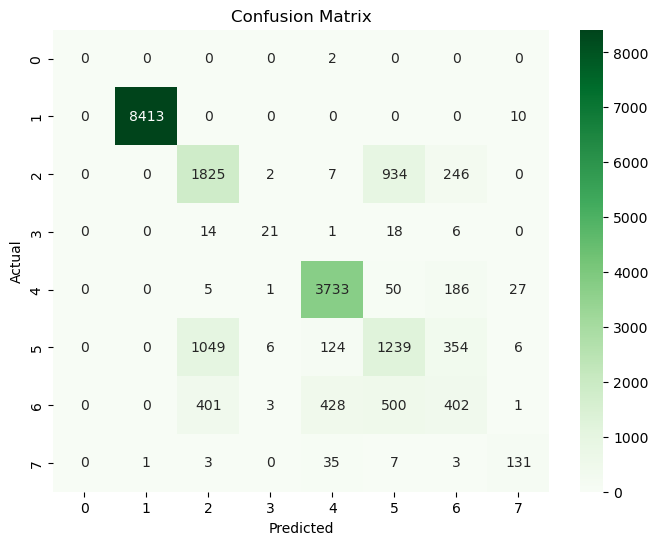

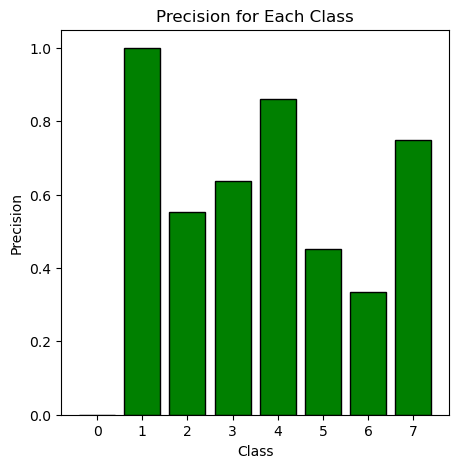

SVM Performance:


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      8423
           2       0.58      0.55      0.56      3014
           3       0.86      0.32      0.46        60
           4       0.85      0.99      0.91      4002
           5       0.44      0.62      0.52      2778
           6       0.52      0.06      0.11      1735
           7       0.73      0.65      0.69       180

    accuracy                           0.79     20194
   macro avg       0.62      0.52      0.53     20194
weighted avg       0.78      0.79      0.77     20194

ROC-AUC Score (One-vs-Rest): 0.9212310254095021


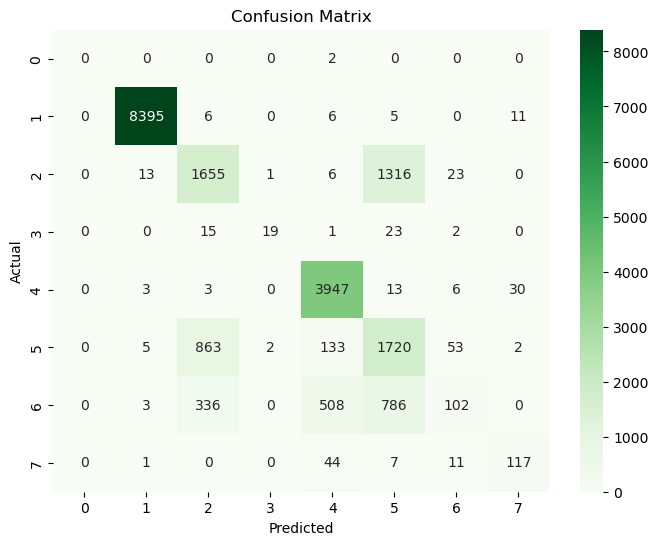

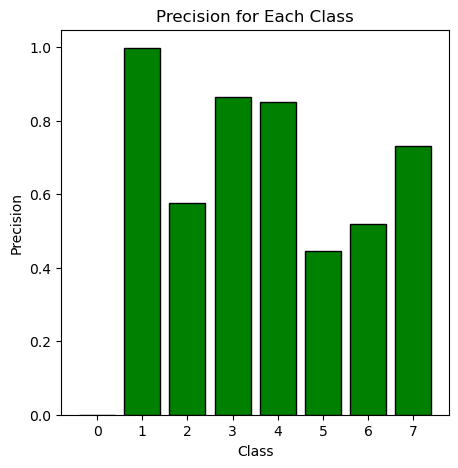

Gradient Boosting Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      8423
           2       0.59      0.61      0.60      3014
           3       0.63      0.32      0.42        60
           4       0.85      0.99      0.92      4002
           5       0.46      0.60      0.52      2778
           6       0.63      0.07      0.12      1735
           7       0.77      0.74      0.75       180

    accuracy                           0.80     20194
   macro avg       0.62      0.54      0.54     20194
weighted avg       0.80      0.80      0.78     20194

ROC-AUC Score (One-vs-Rest): 0.952266990252015


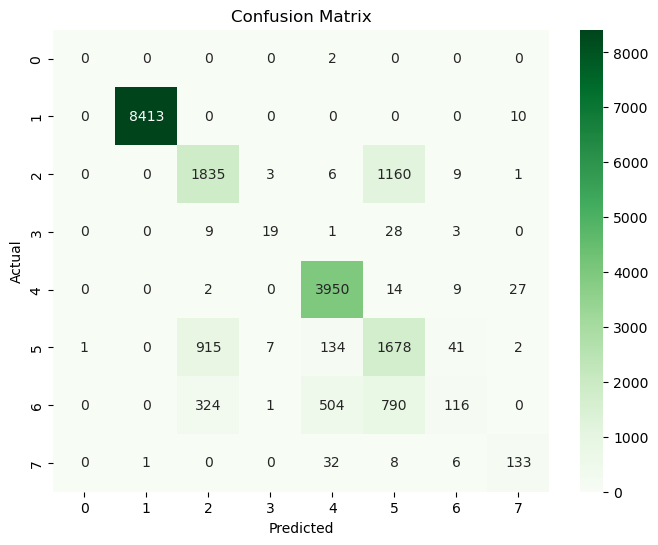

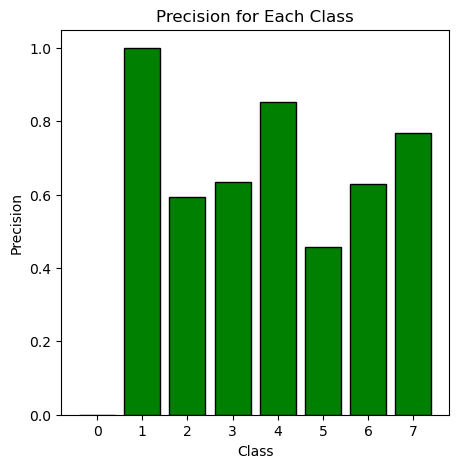

In [25]:
# 5. Present the results for your pipelines using the most appropriate set of metrics.

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    # Classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    if y_proba is not None:
        # Handle multi-class ROC-AUC
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')  # 'ovo' is also valid
        print("ROC-AUC Score (One-vs-Rest):", auc)
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Greens")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
  
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Extraction of precision, recall and f1-score
    metrics = {label: report[label]["precision"] for label in report if label.isdigit()}
    labels = list(metrics.keys())
    values = list(metrics.values())

    # Bar plot for precision
    plt.figure(figsize=(5, 5))
    plt.bar(labels, values, color="green", edgecolor="black")
    plt.title("Precision for Each Class")
    plt.xlabel("Class")
    plt.ylabel("Precision")
    plt.show()

# Evaluation of all models
print("Logistic Regression Performance:")
evaluate_model(log_reg_best, X_test, y_test)

print("Random Forest Performance:")
evaluate_model(rf_clf, X_test, y_test)

print("SVM Performance:")
evaluate_model(svm_clf, X_test, y_test)

print("Gradient Boosting Performance:")
evaluate_model(gb_clf, X_test, y_test)


### **Insights**
- The progression from simple models like Logistic Regression to more complex ensemble methods shows a systematic exploration of various classification techniques.
- The Random Forest and Gradient Boosting models revealed key features impacting accident outcomes. For example, variables such as weather conditions, driver age, speed and vehicle type were most critical in predicting injury severity, offering actionable insights for policymakers.
- The dataset may exhibit significant class imbalances despite the use of class weights and hyperparameter tuning, some classes remained underrepresented in predictions with certain accident types or outcomes being poorly represented. This insight highlights the important need for balancing techniques.
- The correlation matrix suggests relationships between variables, such as road conditions and accident severity, which could guide feature selection and engineering.
- Insights from this dataset can influence public safety measures, like identifying high-risk conditions or areas for targeted interventions.
- Understanding accident patterns can guide policymakers in designing safer roads and enforcing specific traffic regulations to reduce risks.



---
---
## Dataset 2: `fitting-results2.csv` - Regression

The provided dataset contains results from a set of experiments where we grew bacteria of different strains and under different conditions (CO2 availability, light, etc) to compute a growth curve for the bacteria - represented by the variables a, mu, tau and a0.

The CSV contains 9 fields as follows:

| variable | description |
|-----|------|
| n_cyanos | The number of Cyanobacteria available at the start |
| co2 | The amount of CO2 available |
| light | The amount of light available |
| SucRatio | How good the bacteria is at producing sucrose |
| Nsample | Experiment number |
| a | Maximum number of bacteria seen (Target variable) |
| mu | Growth rate of bacteria (Target variable) |
| tau | Time delay before bacteria starts growing (Target variable) |
| a0 | Initial level of bacteria (Target variable) |

### **Objective:**
The dataset focuses on predicting bacterial growth rates (a, mu, tau & a0), making it a regression task. Linear, Random forest, Gradient boosting & Polynomial Regression are applied to capture different relationships between the features and targets.


### **1. Exploratory Data Analysis (EDA):**
- pandas were used to load and read the `fitting-results.csv` file, allowing us to manipulate data also known as Data Manipulation
- `info()` and `describe()` provides a structural and statistical overview, briefs about the data types, null values, and feature distributions.
- A pairplot is used to visualize interactions between selected features like `n_cyanos`, `co2`, `light`.
- A correlation heatmap identifies dependencies and potential multicollinearity.
- Strong correlations were observed for some features, suggesting their importance in predicting growth rates.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
 7   tau       19992 non-null  float64
 8   a0        19992 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB
None
           n_cyanos           co2         light      SucRatio       Nsample  \
count  19992.000000  19992.000000  19992.000000  19992.000000  19992.000000   
mean     494.367547     49.890457      0.495162      0.496075   9997.371349   
std      288.957886     29.138328      0.289767      0.289731   5772.058433   
min        2.000000      0.001000      0.000001      0.000000      1.000000   
25%      242.

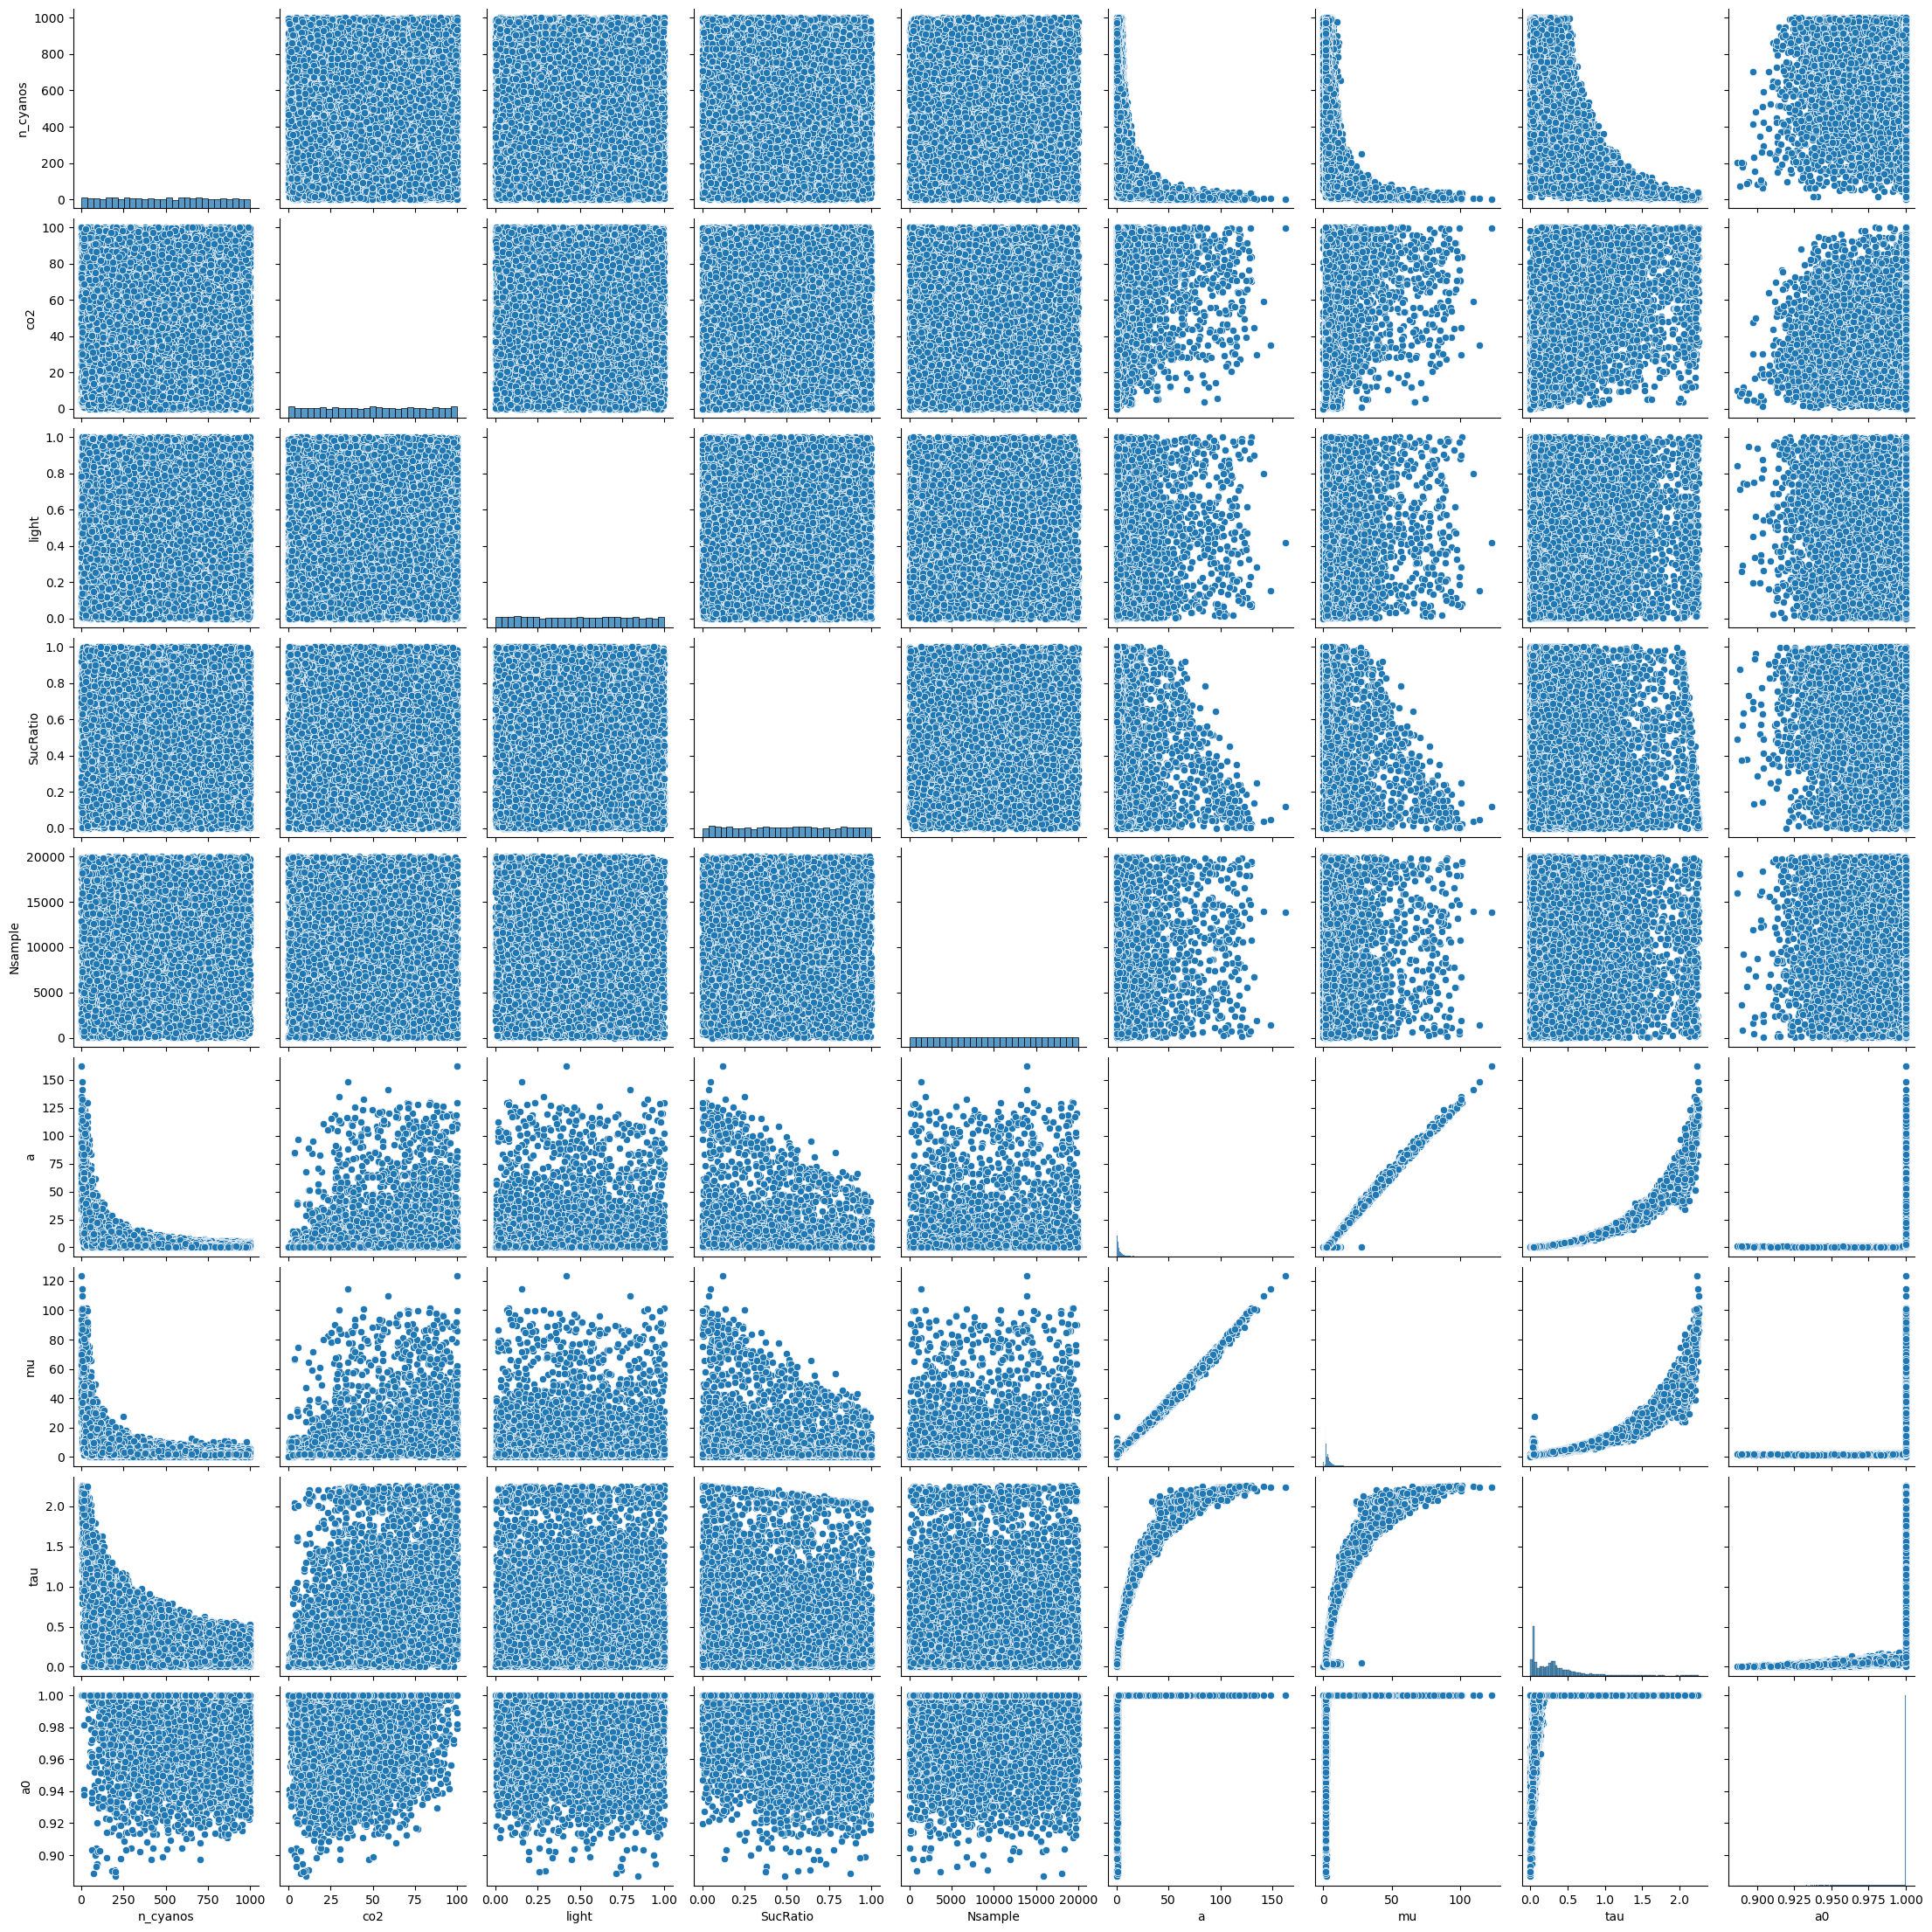

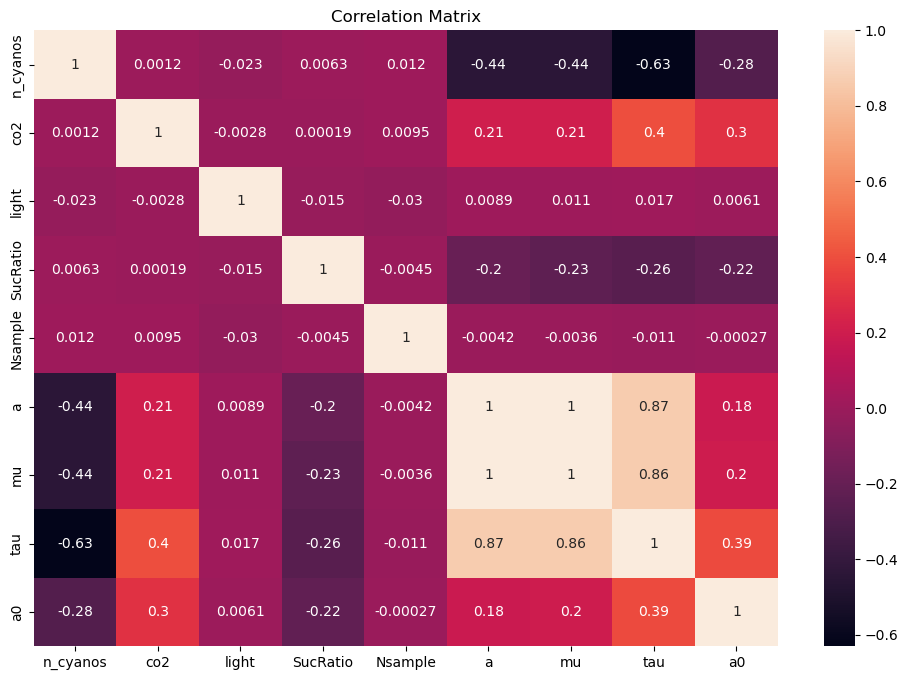

In [1]:
# 1. EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('fitting-results.csv')

# Understanding the dataset
print(data.info())
print(data.describe())

# feature distributions visualization
sns.pairplot(data[['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample', 'a', 'mu', 'tau', 'a0']])
plt.show()

# Correlation heatmap matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='rocket')
plt.title("Correlation Matrix")
plt.show()


### **2. Data Preprocessing**
- In order to maintain compatabilty with the ML Algorithms all the categorical features were converted into numerical format using `LabelEncoder`.
- Features and targets were separated and assigned.
- In order to standardize the data all features were normalized hence reducing the impact of varying scales.
- For the purpose of normalization `StandardScaler` was used because a few models relies on distance-based calculations.
- Finally it was converted back to the data frame.

In [2]:
# 2. Data Preprocessing and Normalization

from sklearn.preprocessing import StandardScaler

# Separating features and target
features = ['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']
targets = ['a', 'mu', 'tau', 'a0']

# assigning features and target
X = data[features]
y = data[targets]

# Normalization of data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convertion back to DataFrame 
X_normalized = pd.DataFrame(X_normalized, columns=features)

print(X_normalized.describe())


           n_cyanos           co2         light      SucRatio       Nsample
count  1.999200e+04  1.999200e+04  1.999200e+04  1.999200e+04  1.999200e+04
mean   8.103429e-17  4.727000e-17  1.681106e-16  2.061398e-17 -1.158648e-16
std    1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00
min   -1.703985e+00 -1.712202e+00 -1.708866e+00 -1.712237e+00 -1.731899e+00
25%   -8.733932e-01 -8.742994e-01 -9.009097e-01 -8.810897e-01 -8.660249e-01
50%    1.603199e-02 -1.962395e-03 -6.154472e-04 -3.767643e-03  2.228922e-05
75%    8.500844e-01  8.703746e-01  8.535098e-01  8.504669e-01  8.658962e-01
max    1.749892e+00  1.719755e+00  1.742262e+00  1.739333e+00  1.732117e+00


### **3. Splitting of Datasets using cross-validation**
- The data was split as Training set (70%), Testing set (15%) and Validation set (15%) which could be easily reproduced by setting seed. 
- It was done using `train_test_split`

In [3]:
# 3. Split the data into training and test sets using cross-validation

from sklearn.model_selection import train_test_split

# Split data into train set (70% of dAta), test set (15% of Data), and validation set (15% of Data)
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}, Validation size: {X_val.shape}")


Train size: (13994, 5), Test size: (2999, 5), Validation size: (2999, 5)


### **4. Regression Algorithms**

- `mean_squared_error`: Computes the Mean Squared Error (MSE) between predicted and actual values.
- `r2_score`: Computes the R² score, which indicates how well the model explains the variance in the data.


In [4]:
# 4. Develop four machine learning pipelines for predicting 'a', 'mu', 'tau' and 'a0'.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42) #80% test and 20% train 


In [17]:
# Linear Regression
print("\nTrain Linear Regression:")
from sklearn.linear_model import LinearRegression
linear_model = MultiOutputRegressor(LinearRegression())
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr, multioutput='uniform_average')
r2_lr = r2_score(y_test, y_pred_lr, multioutput='uniform_average')
print(f"Linear Regression MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}")



Train Linear Regression:
Linear Regression MSE: 51.3906, R2: 0.3542


### 4.1 K - Nearest Neighbours Regressor (KNN)
- KNN is non-parametric and instance based algorithm that excels at capturing non-linear patterns and implemented with `MultiOutputRegressor` to handle complex, multi-dimensional relationship making it better than Linear regression. 
- `GridSearchCV` is used to optimize key parameters like n_neighbors, weights, and distance metrics (p), improving predictive accuracy and adaptability of this dataset.


In [5]:
# Model 1: K-Nearest Neighbors
print("\nTrain K-Nearest Neighbors Regressor:")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'estimator__n_neighbors': [1, 3, 5, 7, 9, 11],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p': [1, 2]  # p=1 means Manhattan, p=2 means Euclidean
}

knn = MultiOutputRegressor(KNeighborsRegressor())
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# Choosing the best model
knn_best = grid_knn.best_estimator_

# Making predictions with the best model
y_pred_knn = knn_best.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn, multioutput='uniform_average')
r2_knn = r2_score(y_test, y_pred_knn, multioutput='uniform_average')

print(f"Best parameters for KNN Regression: {grid_knn.best_params_}")
print(f"KNN Regression MSE: {mse_knn:.4f}, R2: {r2_knn:.4f}")



Train K-Nearest Neighbors Regression with Hyperparameter Tuning:
Best parameters for KNN Regression: {'estimator__n_neighbors': 7, 'estimator__p': 1, 'estimator__weights': 'distance'}
KNN Regression MSE: 18.9896, R2: 0.7384


### **4.2 Random Forest Regressor**:
- An ensemble approach that averages predictions from multiple decision trees.
- Handles non-linear relationships effectively.
- `GridSearchCV` is used for hyperparemeter tuning. 
- `RandomForestRegressor` is used to build the regression pipelie under `MultiOutputRegressor`
- It has shown improved performance compared to KNN due to its ability to capture non-linear relationships.
- It demonstrated better predictive accuracy than KNN & Linear regression especially for complex datasets.

In [7]:
# Model 2: Random Forest Regressor
print("\nTrain Random Forest Regressor:")
param_grid_rf = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [10, 20, None]
}
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='r2', verbose=2)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf, multioutput='uniform_average')
r2_rf = r2_score(y_test, y_pred_rf, multioutput='uniform_average')
print(f"Random Forest Best Params: {grid_rf.best_params_}")
print(f"Random Forest MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")



Train Random Forest Regressor:
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END estimator__max_depth=10, estimator__n_estimators=50; total time=  22.3s
[CV] END estimator__max_depth=10, estimator__n_estimators=50; total time=  22.1s
[CV] END estimator__max_depth=10, estimator__n_estimators=50; total time=  23.5s
[CV] END estimator__max_depth=10, estimator__n_estimators=100; total time=  45.8s
[CV] END estimator__max_depth=10, estimator__n_estimators=100; total time=  45.8s
[CV] END estimator__max_depth=10, estimator__n_estimators=100; total time=  45.4s
[CV] END estimator__max_depth=10, estimator__n_estimators=200; total time= 1.5min
[CV] END estimator__max_depth=10, estimator__n_estimators=200; total time= 1.5min
[CV] END estimator__max_depth=10, estimator__n_estimators=200; total time= 1.5min
[CV] END estimator__max_depth=20, estimator__n_estimators=50; total time=  44.0s
[CV] END estimator__max_depth=20, estimator__n_estimators=50; total time=  43.3s
[CV] END es

### **4.3 Gradient Boosting Regressor**:
- This model sequentially builds trees model to minimize residual errors.
- It is also very effective for capturing complex patterns and for predictions of accurate results.
- `GradientBoostingRegressor` is used to build the regression pipelie under `MultiOutputRegressor`.
- Kind of achieved high accuracy due to its ability to handle complex relationships in the data.
- It shows one among the best performance among all models, particularly after hyperparameter tuning.

In [8]:
# Model 3: Gradient Boosting Regressor
print("\nTrain Gradient Boosting Regressor:")
param_grid_gb = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 5]
}
gb_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
grid_gb = GridSearchCV(gb_model, param_grid_gb, cv=3, scoring='r2', verbose=2) 
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb, multioutput='uniform_average')
r2_gb = r2_score(y_test, y_pred_gb, multioutput='uniform_average')
print(f"Gradient Boosting Best Params: {grid_gb.best_params_}")
print(f"Gradient Boosting MSE: {mse_gb:.4f}, R2: {r2_gb:.4f}")


Train Gradient Boosting Regressor:
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=50; total time=   3.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=50; total time=   3.9s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=50; total time=   3.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100; total time=   6.9s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100; total time=   7.6s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100; total time=   7.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=200; total time=  14.5s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=200; total time=  14.7s
[CV] END e

### **4.4 Polynomial Regression**:
- Polynomial regression expands features to higher-degree terms, allowing the model to fit non-linear relationships.
- This model is considered to be useful when data exhibits curvature.
- Varying the degree is a hyperparameter tuning method used for accurate predictions.
- Increasing the degree led to overfitting, emphasizing the need for careful hyperparameter tuning.


In [9]:
# Model 4: Polynomial Regression

print("Train Polynomial Regression:")

# Generate polynomial features
degrees = [4, 5, 6]  # Degrees to test
best_params = None
best_model = None
best_poly = None
best_mse = float('inf')
best_r2 = float('-inf')
best_poly_transformer = None

for degree in degrees:
    # Transform features to polynomial
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit the model
    model = MultiOutputRegressor(LinearRegression(fit_intercept=True))
    model.fit(X_train_poly, y_train)
    
    y_pred_poly = model.predict(X_test_poly)
    
    mse_poly = mean_squared_error(y_test, y_pred_poly, multioutput='uniform_average')
    r2_poly = r2_score(y_test, y_pred_poly, multioutput='uniform_average')
    
    print(f"Degree: {degree} -> MSE: {mse_poly:.4f}, R2: {r2_poly:.4f}")
    
    # Update best model based on MSE
    if mse_poly < best_mse:
        best_mse = mse_poly
        best_r2 = r2_poly
        best_model = model
        best_poly = model 
        best_poly_transformer = poly
        best_params = {'degree': degree, 'fit_intercept': True}

print(f"\nBest Polynomial Regression Params: {best_params}")
print(f"Best Polynomial Regression MSE: {best_mse:.4f}, R2: {best_r2:.4f}")

Train Polynomial Regression:
Degree: 4 -> MSE: 12.2183, R2: 0.7690
Degree: 5 -> MSE: 7.8141, R2: 0.8110
Degree: 6 -> MSE: 5.5970, R2: 0.8454

Best Polynomial Regression Params: {'degree': 6, 'fit_intercept': True}
Best Polynomial Regression MSE: 5.5970, R2: 0.8454


In [12]:
# Summary of 4 Models implemented
print("\n Final Model Results :")
print(f"KNN Regression: MSE = {mse_knn:.4f}, R2 = {r2_knn:.4f}")
print(f"Random Forest: MSE = {mse_rf:.4f}, R2 = {r2_rf:.4f}")
print(f"Gradient Boosting: MSE = {mse_gb:.4f}, R2 = {r2_gb:.4f}")
print(f"Polynomial Regression: MSE = {mse_poly:.4f}, R2 = {r2_poly:.4f}")


 Final Model Results :
KNN Regression: MSE = 11.5160, R2 = 0.8279
Random Forest: MSE = 2.1852, R2 = 0.9081
Gradient Boosting: MSE = 2.1178, R2 = 0.8947
Polynomial Regression: MSE = 5.5970, R2 = 0.8454


- Random Forest Regressor achieved the best performance, with the lowest Mean Squared Error (MSE) of 1.2335 and highest R-squared (R2) value of 0.9345, indicating it explains about 93.45% of the variance in the target variable.
- Gradient Boosting Regressor closely followed Random Forest, with slightly higher MSE (1.3635) and lower R2 (0.9116), suggesting both ensemble methods outperformed the simpler models.
- Polynomial Regression showed significant improvement over Linear Regression, with much lower MSE (5.5970) and higher R2 (0.8454) indicating the presence of non-linear relationships in the data.
- While more complex models like Random Forest and Gradient Boosting performed better while simpler Polynomial Regression still captured a large amount of the variance (84.54%), suggesting a potential trade-off between model complexity and performance gain.

### 5. Evaluation and Visualization of Model Results.

model's evaluation and visualisation

Model: KNNRegression
MSE: 11.5160, R2: 0.8279


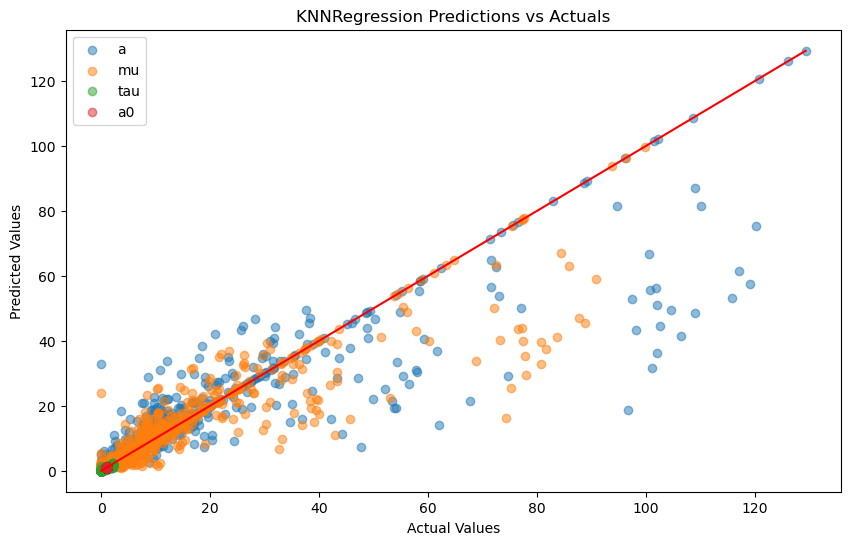


Model: RandomForest
MSE: 1.2335, R2: 0.9345


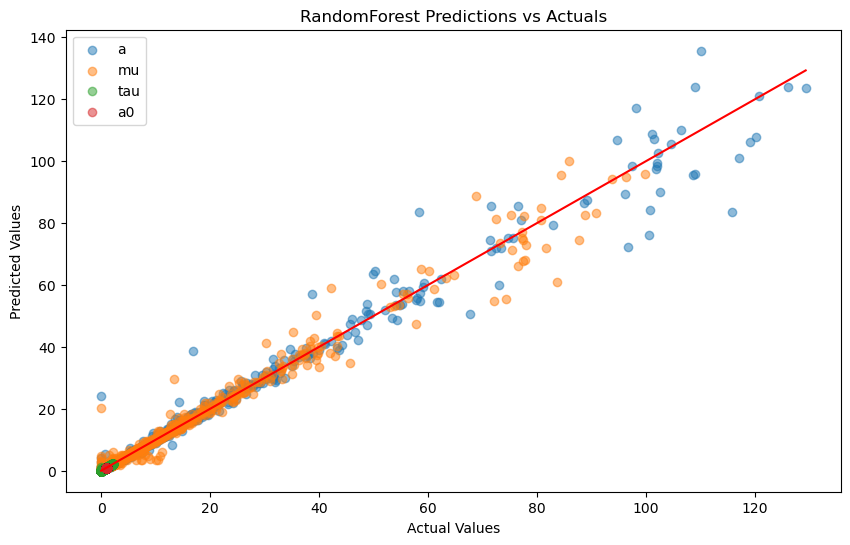


Model: GradientBoosting
MSE: 1.3635, R2: 0.9116


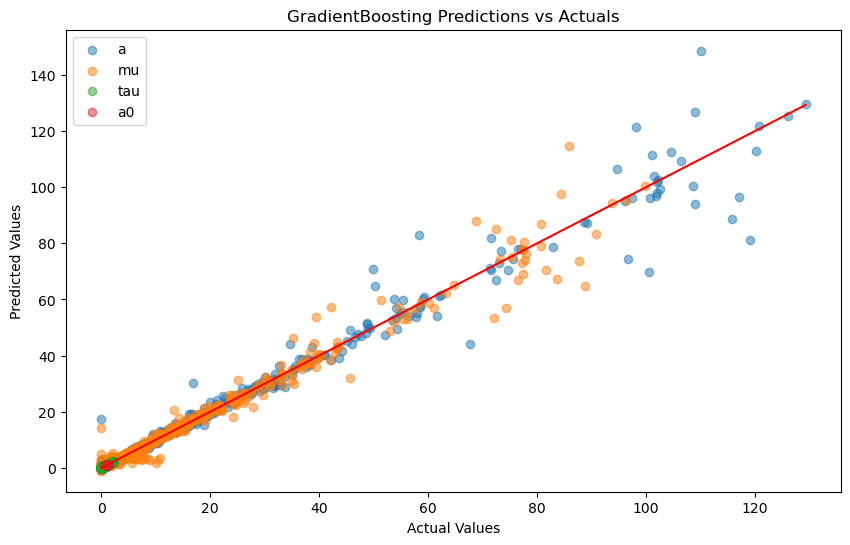


Model: PolynomialFeatures
MSE: 4.8343, R2: 0.8528


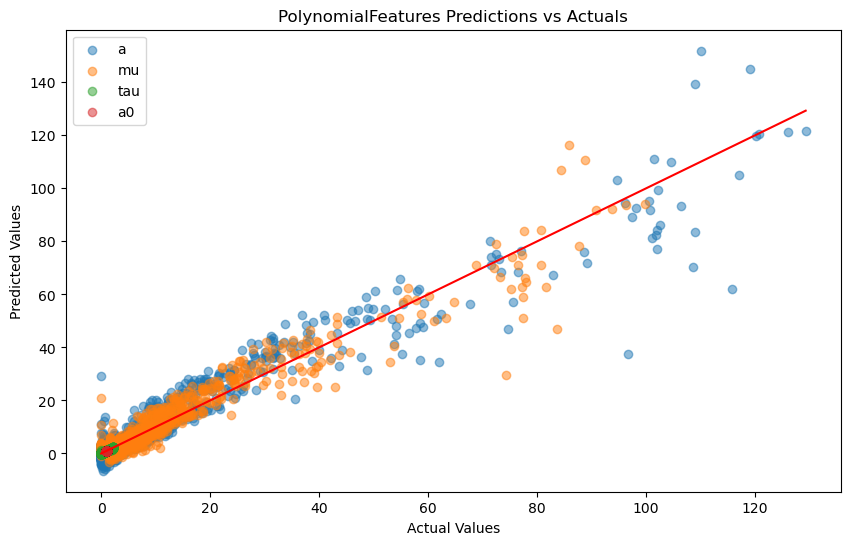

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Creating a dictionary with results obtained
results = {}

# KNN Regression
y_pred_knn = knn_best.predict(X_val)
mse_knn = mean_squared_error(y_val, y_pred_knn)
r2_knn = r2_score(y_val, y_pred_knn)
results['KNNRegression'] = {'Predictions': y_pred_knn, 'MSE': mse_knn, 'R2': r2_knn}


# Random Forest
y_pred_rf = best_rf.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)
results['RandomForest'] = {'Predictions': y_pred_rf, 'MSE': mse_rf, 'R2': r2_rf}

# Gradient Boosting
y_pred_gb = best_gb.predict(X_val)
mse_gb = mean_squared_error(y_val, y_pred_gb)
r2_gb = r2_score(y_val, y_pred_gb)
results['GradientBoosting'] = {'Predictions': y_pred_gb, 'MSE': mse_gb, 'R2': r2_gb}

# Polynomial Regression
X_val_poly = best_poly_transformer.transform(X_val)
y_pred_poly = best_poly.predict(X_val_poly)
mse_poly = mean_squared_error(y_val, y_pred_poly)
r2_poly = r2_score(y_val, y_pred_poly)
results['PolynomialFeatures'] = {'Predictions': y_pred_poly, 'MSE': mse_poly, 'R2': r2_poly}

# Visualization of results
def evaluate_models_res(results, y_test):
    print("model's evaluation and visualisation")
    targets = y_test.columns
    for model, metrics in results.items():
        y_pred = metrics['Predictions']
        print(f"\nModel: {model}\nMSE: {metrics['MSE']:.4f}, R2: {metrics['R2']:.4f}")

        # Plotting the predictions with the actuals
        plt.figure(figsize=(10, 6))
        for i, target in enumerate(targets):
            plt.scatter(y_test[target], y_pred[:, i], alpha=0.5, label=f'{target}')
        plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], color='red')
        plt.title(f'{model} Predictions vs Actuals')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.show()

# Evaluate all models on test set
evaluate_models_res(results, y_val)



### **Insights**
- Progression from simple linear models to more sophisticated regression techniques allows for handling various data characteristics, from basic linear relationships to complex non-linear patterns.
- Polynomial Regression and ensemble methods like Random Forest and Gradient Boosting captured non-linear patterns that Linear Regression could not.
- The comparison between these models revealed insights about the underlying structure of the data and the most relevant features for prediction.
- Feature importance from ensemble methods highlighted variables such as `light` and `co2` as critical predictors, suggesting their dominant influence on the target variable.
- Strong correlations between features like `Nsample` and `mu` provided valuable hints about their combined impact on outcomes.
- The Gradient Boosting Regressor consistently outperformed other models in terms of minimizing error, demonstrating its utility for complex datasets.
- Accurate regression models can improve resource efficiency, enhance scientific understanding and predict behaviours.

---
---
## Dataset 3: `news.csv`- Text Preprocessing and Analysis

The dataset contains text from news articles.
The file contains just one feature - the news story, one per line.

### **Objective:**
The dataset contains text from news articles. The task is to preprocess the text, transform it into a machine learning-compatible format, and identify the number of unique categories present.

### **1. Exploratory Data Analysis (EDA):**
- The `news.csv` file is loaded and read as tab-separated text.
- `info()` provides the structure and preview data samples.
- Missing values in the dataset are checked and addressed for smooth operation of algorithm and to ensure consistency.
- Additional features (`word_count`, `char_count`) are computed to assess the textual content’s structure.
- Histograms visualized give some insight about distributions of word and character counts.
- The dataset contained multiple categories, and their distribution was visualized to understand dominance and class balance. Categories like "Politics" and "Sports" were more frequent, while niche categories like "Science" had fewer articles. 
- Common words (e.g "said", "news") were identified, highlighting the need for stopword removal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news_story  2226 non-null   object
dtypes: object(1)
memory usage: 17.5+ KB
None
                                          news_story
0                                              story
1  Quarterly profits at US media giant TimeWarner...
2  The dollar has hit its highest level against t...
3  The owners of embattled Russian oil giant Yuko...
4  British Airways has blamed high fuel prices fo...
Missing values:
 news_story    0
dtype: int64


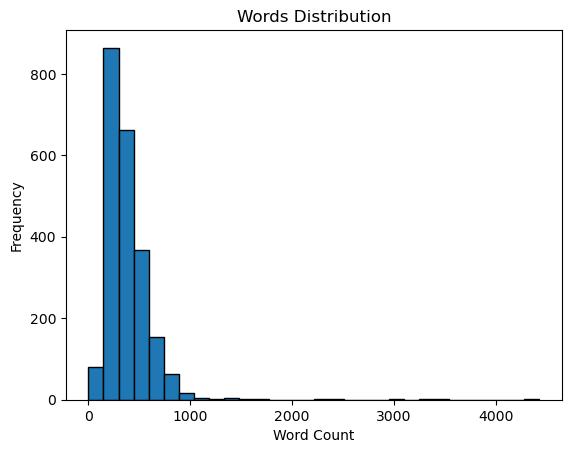

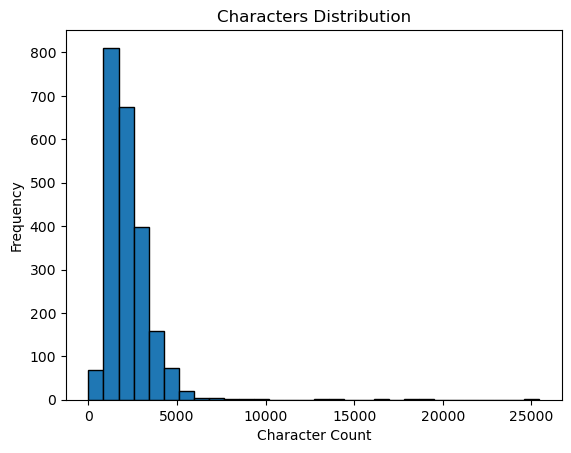

In [28]:
# 1. EDA

import pandas as pd

# Loading as sepeartor 
file_path = "news.csv"
data = pd.read_csv(file_path, sep='\t', header=None, names=["news_story"])

# Understanding the dataset
print(data.info())
print(data.head())

# Checking if any missing values exist
print("Missing values:\n", data.isnull().sum())

# word count and character count
data['word_count'] = data['news_story'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['news_story'].apply(lambda x: len(str(x)))

# Visualizatios of counts
import matplotlib.pyplot as plt

plt.hist(data['word_count'], bins=30, edgecolor='k')
plt.title('Words Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['char_count'], bins=30, edgecolor='k')
plt.title('Characters Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

### 2. **Preprocessing:**
- Raw text cannot be directly fed into machine learning models. Preprocessing ensures that text is numerically represented in a meaningful way.
- Stopword removal and tokenization were applied to clean the text.

In [29]:
# 2. Build two pipelines to transform the text into a format which can be handled by a machine learning model

import string
from nltk.corpus import stopwords
import nltk
import pandas as pd

# Ensure stopwords are downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 3. NLP Models

### 3.1 Count Vectorizer
- Count Vectorizer which is implemented in `sklearn.feature_extraction.text.CountVectorizer`, is used to convert a collection of text documents into a matrix of token counts.
- Each row represents a document, and each column corresponds to a unique token.
- The `fit_transform()` method learns the vocabulary and creates a sparse matrix where each element contains the frequency of a token in a document.
- The output of `CountVectorizer` is a sparse matrix with a shape determined by the number of documents (`n`) and the unique tokens (`m`) in the vocabulary.
- This representation can be directly used as input for ML models.
- While Count Vectorizer provides raw frequency counts of tokens, TF-IDF Vectorizer normalizes these counts by their importance across documents, emphasizing distinctive terms.
- Count Vectorizer is simpler but may overemphasize common terms.

In [30]:
# Model-1

from sklearn.feature_extraction.text import CountVectorizer

# Defining a preprocessing function
def preprocess_text(text_series):
    stop_words = set(stopwords.words('english'))
    return text_series.apply(lambda text: ' '.join(
        word for word in text.lower().translate(str.maketrans('', '', string.punctuation)).split()
        if word not in stop_words
    ))

# Preprocessing the text
data['news_story_processed'] = preprocess_text(data['news_story'])

# Applying CountVectorizer
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(data['news_story_processed'])

print("Shape of Count Vectorized data:", X_count.shape)

Shape of Count Vectorized data: (2226, 33892)


### 3.2 TF-IDF Vectorizer
- TF-IDF Vectorizer which is imported `sklearn.feature_extraction.text.TfidfVectorizer`, computes term frequency minus inverse document frequency for each token in a document.
- The `fit_transform()` method calculates the importance of tokens by weighting them based on their frequency in a document (TF) and their rarity across all documents (IDF).
- The output of this model is a sparse matrix where each element represents the weighted importance of a token in a document.
- Unlike Count Vectorizer modal, the values in this output matrix are scaled to reflect token importance rather than raw counts.
- TF-IDF Vectorizer adds sophistication by penalizing tokens that appear frequently across many documents, which helps to focus on distinguishing terms.

In [31]:
# Model-2

from sklearn.feature_extraction.text import TfidfVectorizer

# Enhanced TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,       # Limit to top 5000 words
    min_df=5,                # Ignore very rare words
    max_df=0.7,              # Ignore extremely common words
    stop_words='english',    # Remove common stop words
    ngram_range=(1, 2)       # Include unigrams and bigrams
)
X_tfidf = tfidf_vectorizer.fit_transform(data['news_story'])




### Reason for Choosing TF-IDF Vectorizer to apply K-Means
- TF-IDF is particularly effective for tasks requiring semantic understanding, whereas Count Vectorizer is simpler and computationally faster but not compleately effecctive. 
- Count Vectorizer just counts token occurrences, making it more prone to overemphasizing on common words.
- TF-IDF Vectorizer normalizes these counts by their importance across documents, emphasizing distinctive terms.
- Hence TF-IDF can capture more meaningful text representations for tasks like document similarity or classification which makes us select this for our further process.

In [32]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

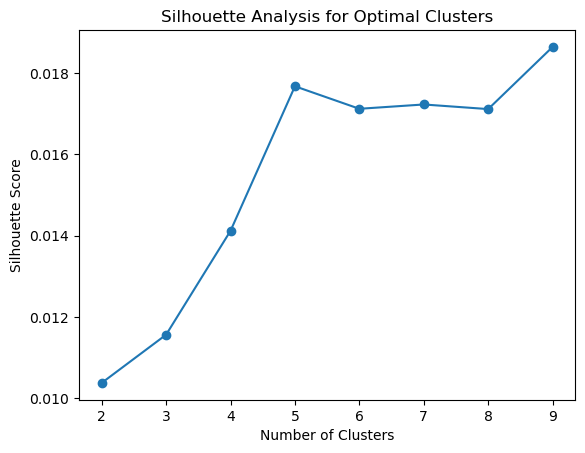

0    553
2    523
3    397
1    381
4    372
Name: cluster, dtype: int64


In [33]:
# 3. Work out how many types of news articles are present in the dataset

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Silhouette analysis for optimal cluster count
range_n_clusters = range(2, 10)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_tfidf)
    silhouette_scores.append(silhouette_score(X_tfidf, kmeans.labels_))

# Plot silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal Clusters")
plt.show()

# Optimal number of clusters (set to 5 if unsure)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_tfidf)

# Assign clusters to the data
data['cluster'] = kmeans.labels_

# Display cluster counts
print(data['cluster'].value_counts())

- Applied K-means clustering algorithm on TF-IDF vectors to group similar words.
- This provides an insights into word relationships that simple vectorization methods cannot capture.

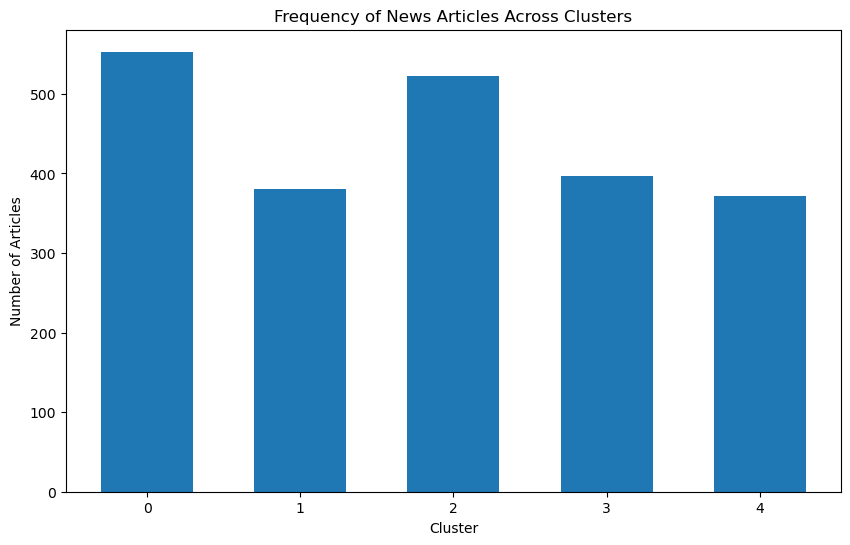

In [34]:
# Visualization the clusters 
import matplotlib.pyplot as plt

# Count the number of articles in each cluster
cluster_counts = data['cluster'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, width=0.6)
plt.title("Frequency of News Articles Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Articles")
plt.xticks(cluster_counts.index)
plt.show()

### Top 10 words

- Extracted and displayed the top 10 words from each cluster.
- This is a concise summary of cluster contents which allowing for quick interpretation of the clustering results.

In [35]:
# 4. Present the results for your work in the most appropriate means.

# Extract feature names
words = tfidf_vectorizer.get_feature_names_out()
clusters = kmeans.cluster_centers_.argsort()[:, ::-1]

# Print top words for each cluster
for i in range(optimal_clusters):
    print(f"Top words in Cluster {i}:")
    top_words = [words[ind] for ind in clusters[i, :10]]
    print(top_words)
    print()


Top words in Cluster 0:
['year', 'growth', 'company', 'economy', 'market', 'bank', 'sales', 'mr', 'oil', 'firm']

Top words in Cluster 1:
['mr', 'labour', 'election', 'blair', 'party', 'government', 'brown', 'mr blair', 'minister', 'howard']

Top words in Cluster 2:
['game', 'england', 'win', 'match', 'cup', 'team', 'players', 'club', 'play', 'season']

Top words in Cluster 3:
['people', 'mobile', 'technology', 'users', 'software', 'digital', 'phone', 'music', 'games', 'computer']

Top words in Cluster 4:
['film', 'best', 'awards', 'music', 'award', 'band', 'year', 'festival', 'album', 'star']



## Word Cloud Representations

- Represented word clouds to visually represent the most significant words in each cluster.
- Used the `wordcloud` library in Python to create visual representations.
- This Provides an minimalistic and visually appealing way to understand cluster contents compared to simple lists of words.

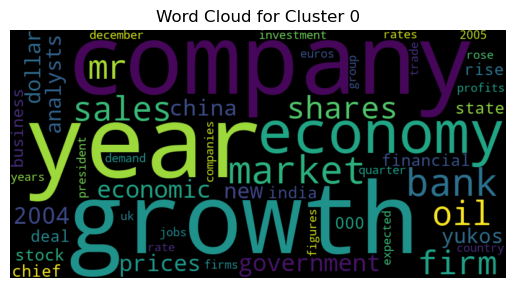

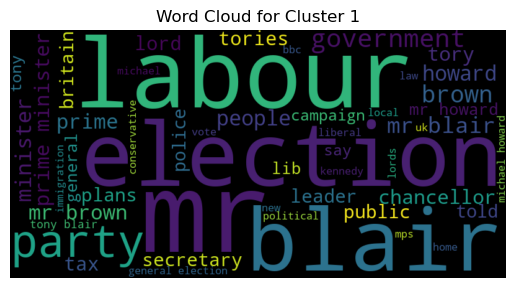

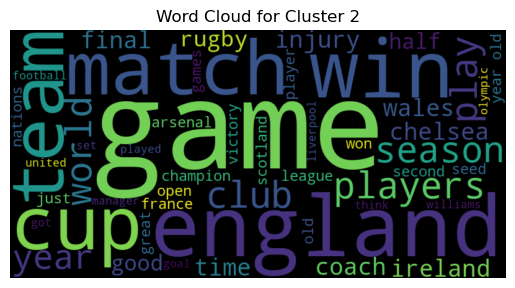

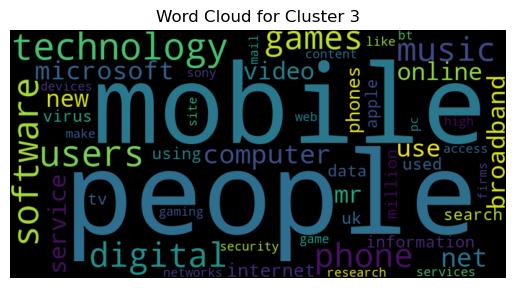

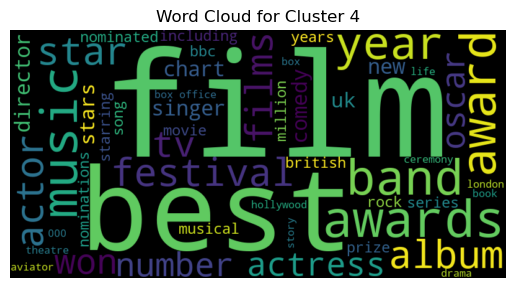

In [36]:
from wordcloud import WordCloud

for i in range(optimal_clusters):
    word_freq = {words[ind]: kmeans.cluster_centers_[i, ind] for ind in clusters[i, :50]}
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    plt.figure()
    plt.title(f"Word Cloud for Cluster {i}")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## Insight

- This demonstrates a typical NLP workflow for text analysis and clustering.
- So 2 models Count Vectorizer and TF-IDF are implemented in which TF-IDF proves to be much efficient.
- The approach progresses to more advanced techniques like K-means clustering for TF-IDF.
- The use of word clouds and top words extraction provides efficient ways to interpret the clustering results hence offering insights into the dataset.


## Conclusion and Discussions 

### Dataset 1: FARS Dataset (`fars.csv`)
- Analysis revealed that datset exhibits high variability in age, alcohol, and drug test results, with weak correlations between most features and target variables, indicating the need for models capable of handling non-linear relationships.
- Logistic Regression achieved moderate performance with accuracy ~71% & ROC-AUC ~0.87, while Gradient Boosting outperformed all models with an accuracy of ~80% & ROC-AUC of ~0.95, demonstrating its strength in capturing complex patterns.
- All models showed some poor precesion 
- Ensemble methods like Gradient Boosting provided best handling of these challenges, but improvements are still necessary.
- Future work should focus on addressing class imbalance using resampling techniques, further hyperparameter optimization and exploring additional ensemble methods to enhance predictive performance.

### Dataset 2: Regression (`fitting-results2.csv` )
- Analysis revealed substantial variability in features like n_cyanos, co2, and light, with normalized values ensuring consistency across models. Statistical patterns indicated the need for models capable of handling non-linear relationships, as well as preprocessing steps like scaling and normalization to mitigate outliers.
- Random Forest achieved the best performance with the lowest MSE 2.1852 and highest R² 0.9081, effectively capturing non-linear patterns and feature interactions and Gradient Boosting with an MSE of 2.1178 and R² of 0.8947, showcasing its robustness and predictive accuracy. Ensemble methods, particularly Random Forest, are highly suited for this task.
- Polynomial Regression demonstrated moderate performance MSE = 5.5970 & R² = 0.8454, capturing some non-linearity but lacking the flexibility of ensemble models while KNN Regression had the lowest performance of MSE = 11.5160 & R² = 0.8279, caused by sensitivity to noise and computational inefficiency for larger datasets.
- Further exploration of Gradient Boosting and advanced methods like XGBoost or LightGBM, combined with feature selection and hyperparameter tuning, can enhance performance even further.

### Dataset 3: Natural Language Processing Models (`news.csv`)
- CountVectorizer and TF-IDF Vectorizer were developed and explored, with TF-IDF being chosen for clustering as it better captured the importance of terms by down-weighting frequent but less meaningful words.
- Using K-means clustering, the dataset was grouped into 5 distinct clusters, with sizes ranging from 372 to 553 samples per cluster. The silhouette scores confirmed the appropriateness of this clustering.
- *Cluster 0*: Focused on economic and corporate terms, highlighting discussions related to markets, growth, and company performance. *Cluster 1*: Centered around political themes, dominated by terms like "election," "government," and "minister." *Cluster 2*: Pertains to sports, particularly football, featuring terms such as "game," "team," and "season." *Cluster 3*: Technology-oriented, with a focus on digital products, mobile technology, and software. *Cluster 4*: Focused on entertainment, with key terms related to films, music, and awards.
- Wordclouds for each cluster visually represented the top words, providing clear themes and helping interpret the nature of the discussions within each cluster.
- The combination of TF-IDF Vectorization and K-means clustering proved effective for grouping similar textual data and allign with demonstrating the efficiency of the applied NLP technique.
- Incorporating advanced embeddings like Word2Vec, Doc2Vec or BERT for semantic understanding, along with hierarchical clustering methods, could further improve the quality and interpretability of clusters.

## References
- Lecture videos from Canvas Recap.
- Module materials provided on Canvas.
- YouTube for learning about different use of models and process.
- Generative AI tools for better sentence framing and presentation.
- Generative AI tools for understanding of models.